---
# 🏷️Annotations on chromosomes

In [1]:
## requirements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## input parameters
chromosome='1'
arm='p'
test=False
# test=True
input_dir_path='inputs'
output_dir_path='outputs'

In [ ]:
## set the current directory to 'examples'
import os
if len(set(['chrov','examples','tests']) - set(os.listdir('.')))==0:
    ## change the current directory from 'chrov' to 'examples'
    os.chdir('./examples')

In [4]:
if test:
    import logging
    logging.basicConfig(level=logging.INFO)

**Demo data**

In [5]:
# cytobands to plot the chromosome
cytobands=pd.read_table(f'{input_dir_path}/cytobands.tsv',index_col=[0])
cytobands.head(1)

,chromosome,p start,q end,start,end,cytoband,cytoband type,arm,chromosome arm
0,1,121700001,125100000,1,2300000,p36.33,gneg,p,chr1p


## Segments/windows

### `arrows`

[(-0.5, 2.0)]

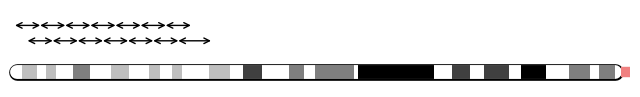

In [6]:
from chrov.viz.chrom import plot_arm
from chrov.viz.annot import show_segments
ax=plot_arm(
    data=cytobands.query(expr=f"`chromosome` == '{chromosome}' & `arm` == '{arm}'"),
    figsize=[8,1],
)
show_segments(
    ax=ax,
    y=1.5,
    offy=0.5,
    kind='arrows',
    segments_kws=dict(
        a=np.arange(1000000,40000000,1),
        size=5000000,
        overlap_fraction=0.5,
        stretch_last=True,
    )
    )
_=ax.axis('off')
ax.set(ylim=[-0.5,2])

### `bands`

[(-0.5, 2.0)]

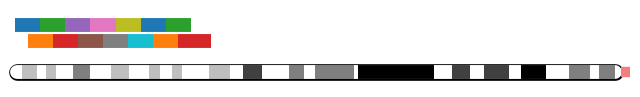

In [7]:
ax=plot_arm(
    data=cytobands.query(expr=f"`chromosome` == '{chromosome}' & `arm` == '{arm}'"),
    figsize=[8,1],
)
show_segments(
    ax=ax,
    y=1.5,
    offy=0.5,
    kind='bands',
    segments_kws=dict(
        a=np.arange(1000000,40000000,1),
        size=5000000,
        overlap_fraction=0.5,
        stretch_last=True,
    )
    )
_=ax.axis('off')
ax.set(ylim=[-0.5,2])

## Loci e.g. gene names

Interactive ideogram for debugging: https://bioinformatics.mdanderson.org/ideogramviewer/Ideogram.html?genelist1=PPP1CC

**Demo data**

In [8]:
genes=pd.read_table(f'{input_dir_path}/genes.tsv',index_col=[0])
genes=genes.assign(
    value=lambda df: df['gene start']/df.groupby('chromosome')['gene start'].transform(max)
    )
genes.head(1)

,gene symbol,chromosome,gene start,value
0,ATAD3B,1,1471765,0.005913


In [9]:
## input parameters
test=False
# test=True

## Chromosomes

In [10]:
import seaborn as sns
import roux.lib.df as rd

In [11]:
data=(genes
     ).sample(10,random_state=1)
data

,gene symbol,chromosome,gene start,value
19816,P2RY4,X,70258166,0.450313
8086,ACTG1,17,81509413,0.981100
10523,ZNF638,2,71276561,0.294660
10550,BCL11A,2,60450520,0.249905
9957,NRTN,19,5805067,0.099127
757,CCDC24,1,43991359,0.176739
1850,CD160,1,145719471,0.585439
16736,AHR,7,16916359,0.106373
15270,ISOC1,5,129094749,0.711786
17913,PPDPFL,8,49054311,0.338183


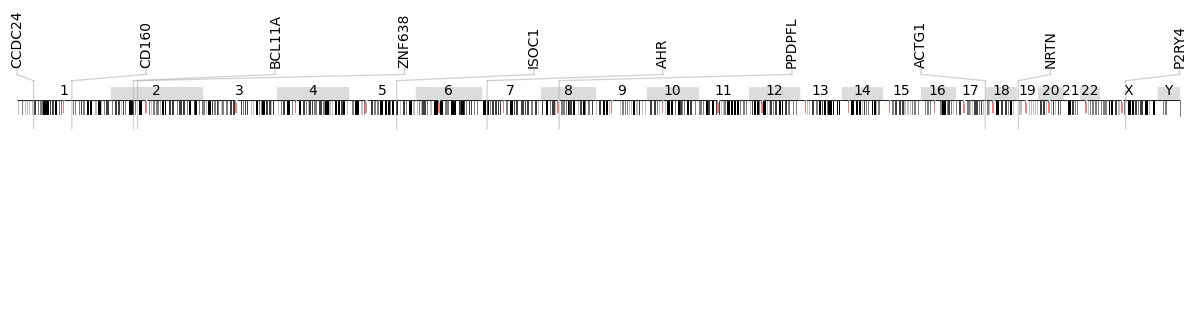

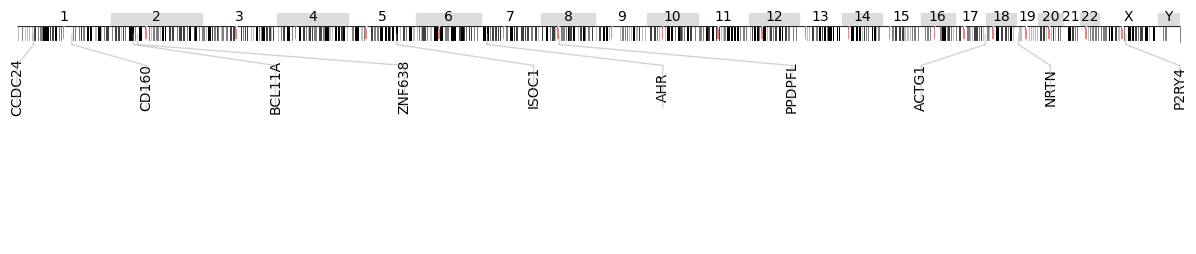

In [13]:
from chrov.viz.chrom import annot_chroms,_concat_chroms
from chrov.viz.annot import annot_labels
for loc in ['out','in']:
    fig,ax=plt.subplots(figsize=[15,3])
    ax_chrom,df1=annot_chroms(
        # ax=ax,
        data=cytobands,
        chromosomes=data['chromosome'].unique(),
        ax_chrom=ax,
        chrom_y=0,
        out_data=True,
        )
    # ax_chrom.set(ylim=[-0.5,0.1])
    ## rescale the genome coordinates by the joined chromosomes
    colx='gene start'
    df2=_concat_chroms(
        data,
        col_start=colx,
        col_end=colx,
        col_chroms_start=colx+' chroms',
        col_chroms_end=colx+' chroms',
        genome_ends=df1.set_index('chromosome')['genome end'],
    )
    _=annot_labels(
        ax_chrom=ax_chrom, # A
        loc=loc,
        colx=colx+' chroms',
        data=df2,
        chrom_y=0,
        col_label='gene symbol',
        # yoff_scales=[0.7,0.6,0.01],
        fig=fig,
        test=test,
        )